# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.0.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.10.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.100.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1000.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1008.jpg
C:/Users/Admin/Downloads/Thesis Co

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

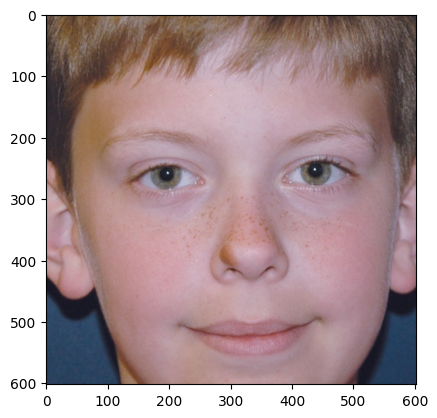

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

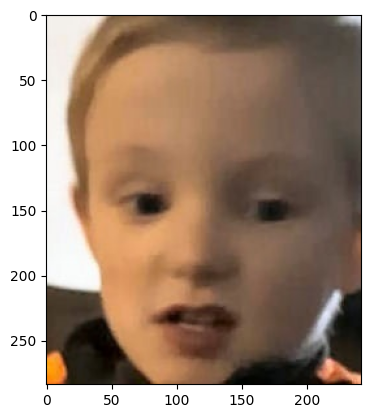

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

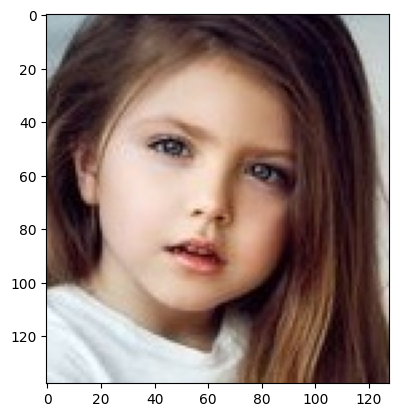

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Shape Of Data

# Preprocessing 

In [13]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a function for image preprocessing with CLAHE
def preprocess_image(train_data, target_size=(224, 224), grayscale=True, apply_clahe=True):
    # Read the image
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    # Convert to grayscale if specified
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply CLAHE (only for grayscale images)
    if apply_clahe and image.ndim == 2:  # Check if the image is grayscale
        print("hello")
        clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(16, 16))
        image = clahe.apply(image)

    # Resize the image
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Normalize pixel values
    image = image / 255.0
    
    return image

# Preprocess training and validation data with CLAHE and without histogram equalization
X_train_clahe = [preprocess_image(train_data, apply_clahe=True) for train_data in train_imgs]
X_test_clahe = [preprocess_image(test_data, apply_clahe=True) for test_data in test_imgs]
X_val_clahe = [preprocess_image(val_data, apply_clahe=True) for val_data in val_imgs]





hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hell

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


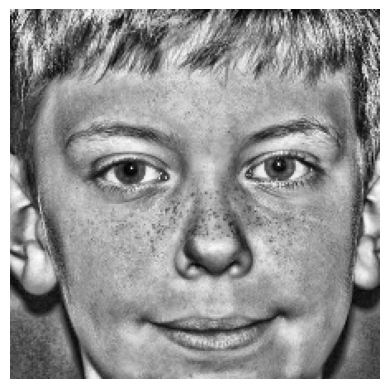

In [14]:
# Display the preprocessed image
plt.imshow(X_train_clahe[0], cmap='gray')
plt.axis('off')
plt.show()

In [15]:
image_shape = X_train_clahe[0].shape
print("Image shape:", image_shape)

Image shape: (224, 224)


In [29]:
# import cv2
# import numpy as np

# def apply_clahe(image):
#     # Convert the image to LAB color space
#     lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
#     # Split the LAB image into L, A, and B channels
#     l_channel, a_channel, b_channel = cv2.split(lab)
    
#     # Apply CLAHE to the L channel
#     clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
#     cl = clahe.apply(l_channel)
    
#     # Merge the CLAHE-enhanced L channel with the original A and B channels
#     enhanced_lab = cv2.merge((cl, a_channel, b_channel))
    
#     # Convert the LAB image back to RGB
#     enhanced_rgb = cv2.cvtColor(enhanced_lab, cv2.COLOR_LAB2RGB)
    
#     # Normalize the pixel values to be between 0 and 1
#     enhanced_rgb_normalized = enhanced_rgb / 255.0
    
#     return enhanced_rgb_normalized

# def apply_clahe_to_array(data_array):
#     # Apply CLAHE and normalization to each image in the array
#     enhanced_data = [apply_clahe(image) for image in data_array]
    
#     return np.array(enhanced_data)

# # Example usage
# # Assuming X_train, X_test, and X_val are already loaded with preprocessed data

# # Apply CLAHE and normalization to the datasets
# X_train_clahe = apply_clahe_to_array(X_train)
# X_test_clahe = apply_clahe_to_array(X_test)
# X_val_clahe = apply_clahe_to_array(X_val)


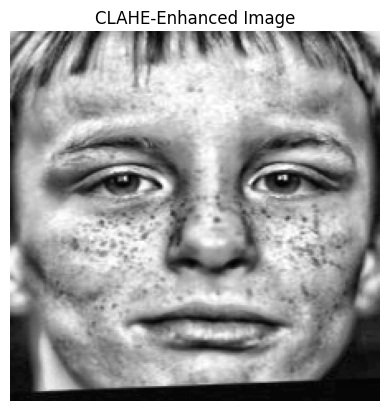

In [16]:
# Assuming X_train_clahe is a list of images
image = X_train_clahe[10]

# Display the image
plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
plt.title('CLAHE-Enhanced Image')
plt.axis('off')
plt.show()


# Converting Train & Val Data To np Array


In [31]:
import numpy as np

# Batch size for processing images
batch_size = 32

# Convert grayscale images to RGB format in batches
X_train_rgb_batches = []
for i in range(0, len(X_train_clahe), batch_size):
    batch = X_train_clahe[i:i+batch_size]
    rgb_batch = [np.repeat(img[..., np.newaxis], 3, axis=-1) for img in batch]
    X_train_rgb_batches.extend(rgb_batch)

# Convert lists to NumPy arrays
X_train_rgb = np.array(X_train_rgb_batches)

# Convert grayscale images to RGB format in batches
X_test_rgb_batches = []
for i in range(0, len(X_test_clahe), batch_size):
    batch = X_test_clahe[i:i+batch_size]
    rgb_batch = [np.repeat(img[..., np.newaxis], 3, axis=-1) for img in batch]
    X_test_rgb_batches.extend(rgb_batch)

# Convert lists to NumPy arrays
X_test_rgb = np.array(X_test_rgb_batches)


# Convert grayscale images to RGB format in batches
X_val_rgb_batches = []
for i in range(0, len(X_val_clahe), batch_size):
    batch = X_val_clahe[i:i+batch_size]
    rgb_batch = [np.repeat(img[..., np.newaxis], 3, axis=-1) for img in batch]
    X_val_rgb_batches.extend(rgb_batch)

# Convert lists to NumPy arrays
X_val_rgb = np.array(X_val_rgb_batches)

# Assuming y_train, y_val, and y_test are 1D arrays
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)


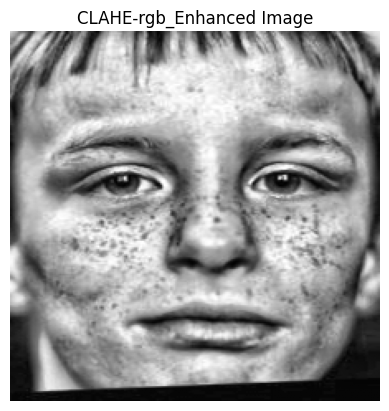

In [34]:
# Assuming X_train_clahe is a list of images
image = X_train_rgb[10]

# Display the image
plt.imshow(image, cmap='gray')  # Assuming the image is grayscale
plt.title('CLAHE-rgb_Enhanced Image')
plt.axis('off')
plt.show()


# Data Augmentation

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generating Larger DataSet - Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=4,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Creating ImageDataGenerator generators
batch_size = 32
train_generator = train_datagen.flow(X_train_rgb, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val_rgb, y_val, batch_size=batch_size)
test_generator = test_datagen.flow(X_test_rgb, y_test, batch_size=batch_size)


# Feature Extraction (vgg16,vgg19,mobilenet,xception,efficentnet)

In [19]:
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.applications import Xception, VGG19, MobileNet, VGG16, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.feature_selection import SelectKBest

# Assuming you have X_train, X_val, y_train_encoded, and y_val_encoded from your previous code

# Define a function for feature extraction using a pre-trained model
def extract_features(model, X_data, input_size=(224, 224)):
    base_model = model(weights='imagenet', include_top=False, input_shape=(input_size[0], input_size[1], 3))
    model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

    features = []
    for img in X_data:
        img = cv2.resize(img, (input_size[0], input_size[1]))  # Resize or crop to match the model's input size
        img = np.expand_dims(img, axis=0)
        features.append(model.predict(img))

    return np.vstack(features)

# Define the models
models = [Xception, VGG19, MobileNet, VGG16, EfficientNetB0]

# Initialize lists to store extracted features
X_train_features = []
X_val_features = []
X_test_features = []

# Extract features using each model
for model in models:
    X_train_features.append(extract_features(model, X_train_rgb))
    X_val_features.append(extract_features(model, X_val_rgb))
    X_test_features.append(extract_features(model, X_test_rgb))

# Convert lists to numpy arrays
X_train_features = np.concatenate(X_train_features, axis=1)
X_val_features = np.concatenate(X_val_features, axis=1)
X_test_features = np.concatenate(X_test_features, axis=1)

# Standardize the features
scaler = StandardScaler()
X_train_features_std = scaler.fit_transform(X_train_features)
X_val_features_std = scaler.transform(X_val_features)
X_test_features_std = scaler.transform(X_test_features)




1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 212ms/step


1/1 [==============================] - 0s 216ms/step


1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 211ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 266ms/step


1/1 [==============================] - 0s 211ms/step


1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 0s 309ms/step


1/1 [==============================] - 0s 246ms/step


1/1 [==============================] - 0s 223ms/step


1/1 [==============================] - 0s 230ms/step


1/1 [==============================] - 0s 203ms/step


1/1 [==============================] - 0s 204ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 221ms/step


1/1 [==============================] - 0s 192ms/step


1/1 [==============================] - 0s 193ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 186ms/step


1/1 [==============================] - 0s 163ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 193ms/step


1/1 [==============================] - 0s 219ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 225ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 66ms/step


1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 57ms/step


# ANOVA Analysis

In [20]:
# Perform ANOVA analysis
k_best = SelectKBest(f_classif, k='all')

X_train_selected = k_best.fit_transform(X_train_features_std, y_train)
X_test_selected = k_best.transform(X_test_features_std)
X_val_selected = k_best.transform(X_val_features_std)

# Print selected features
selected_features_indices = np.where(k_best.get_support())[0]
print("Selected Features Indices:", selected_features_indices)


Selected Features Indices: [   0    1    2 ... 5373 5374 5375]


C:\Users\Admin\.conda\envs\thesis\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [   0    3    4   33   60   62   65   70   73   74  115  122  125  138
  147  150  151  157  164  171  174  191  192  199  216  222  249  250
  254  274  281  312  315  328  330  336  352  357  360  381  389  391
  402  415  430  438  439  441  447  454  464  468  472  473  485  498
  513  514  517  523  552  558  561  569  575  582  583  591  602  609
  615  616  622  627  628  637  643  646  655  656  660  663  664  672
  682  703  721  726  728  738  753  755  759  775  776  787  791  794
  796  813  829  838  866  878  886  893  896  920  924  935  946  953
  956  965  969  970  973  993 1003 1023 1026 1042 1048 1049 1056 1062
 1083 1109 1122 1129 1139 1141 1153 1171 1177 1184 1234 1247 1248 1253
 1310 1333 1339 1341 1347 1348 1353 1356 1358 1359 1365 1414 1415 1416
 1440 1451 1452 1463 1470 1474 1476 1512 1517 1521 1529 1531 1533 1544
 1549 1569 1573 15

# Adaboost

In [21]:
# !pip install xgboost


In [22]:
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train_features_std, X_val_features_std, y_train, y_val from previous code

# Create a logistic regression model (as the base learner)

# Create a logistic regression model (as the base learner)
base_classifier = LogisticRegression(random_state=42)

# Create an XGBoost classifier using logistic regression as the base learner
# xgb_classifier = xgb.XGBClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

# Create an AdaBoostClassifier using the logistic regression model as the base learner
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)


In [23]:
# Train the boosting model
adaboost_classifier.fit(X_train_selected, y_train)

AdaBoostClassifier(estimator=LogisticRegression(random_state=42),
                   random_state=42)

In [24]:
# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_val_selected)

# Evaluate performance
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy*100)

Validation Accuracy: 85.0


In [25]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Make predictions on the validation set
predictions = adaboost_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy * 100)

# Compute precision and recall
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print("Precision:", precision)
print("Recall:", recall)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)


Test Accuracy: 82.0
Precision: 0.8243243243243243
Recall: 0.8133333333333334
Confusion Matrix:
[[124  26]
 [ 28 122]]


# Memory Release

In [26]:
import gc

In [27]:
# del X_train_features, X_val_features, X_train, X_val
# gc.collect()  

# Training And Val Loss

In [42]:
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
# sns.set_style("whitegrid")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training and Validation Loss")

## Classification Report

In [45]:
# cl_report = classification_report(y_test, predictions)
# print(cl_report)

## Confusion Matrix 

In [46]:
# cn_matrix= confusion_matrix(y_test, predictions)
# cn_matrix

## Plotting the True Positives, True Negatives, False Positives and False Negatives 

In [47]:
# # Plotting the True Positives, True Negatives, False Positives and False Negatives from model's predictions
# f, ax = plt.subplots(figsize = (8,6))
# ax = sns.heatmap(cn_matrix, annot=True)
# ax.set_xlabel("Predicted")
# ax.set_ylabel("True")
# ax.set_title("Confusion Matrix")